<a href="https://colab.research.google.com/github/yashverma132005/LLM_projects_/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to import Word2Vec
from gensim.models import Word2Vec

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading data into a pandas dataframe
reviews = pd.read_csv("/content/Product_Reviews.csv")

In [ ]:
# creating a copy of the data
data = reviews.copy()

In [ ]:
data.head(5)

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,"I bought one of the first Paperwhites and have been very pleased with it its been a constant companion and I suppose Ive read, on average, a book every three days for the past however many years on it. I wouldnt give it up youd have to pry it from my cold dead fingers.For sundry logistical reasons, Ive also made good use of Amazons Kindle app on my iPhone. No Paperwhite screen, naturally, and all the cool usability that delivers, but it works well and has its own attractions as a companion to the Kindle.Of course, there are aspects of the Paperwhite which I would like to critique. Ah you knew that was coming somewhere, didnt you.As a member of BookBub, I get a daily list of alerts and book deals in my chosen genres. I take on many of them, however, Ive found that, even with the best will in the world, I cant keep up. Some days it seems that for every book I read, Ive bought two. Theres just so much good stuff out there! The accumulative effect of this is that the number of books actually on my Paperwhite has been creeping ever upward for some time. Its now at about 400.With this in mind, Ive noticed that while page-turning has remained exactly the 

In [ ]:
data.shape

(1007, 3)

In [ ]:
data.isnull().sum()

,0
Product ID,0
Product Review,0
Sentiment,0


In [ ]:
# checking for duplicate values
data.duplicated().sum()

2

In [ ]:
# dropping duplicate values
data = data.drop_duplicates()

data.duplicated().sum()

0

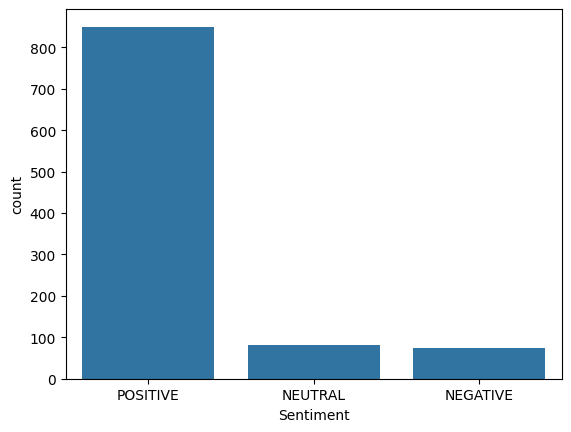

In [ ]:
sns.countplot(data=data, x="Sentiment");

In [ ]:
data['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
POSITIVE,0.845771
NEUTRAL,0.080597
NEGATIVE,0.073632


In [ ]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [ ]:
# Applying the function to remove special characters
data['cleaned_text'] = data['Product Review'].apply(remove_special_characters)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage Fortunately I had friends who owned each so I ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment It s been a week and I am loving my paperwhite no regrets The touch screen is receptive and easy to use and I keep the light at a specific setting regardless of the time of day In any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading Also glad that I went for the international shipping option with Amazon Extra expense but delivery was on time with tracking and I didnt need to worry about customs which I may have if I used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",Allow me to preface this with a little history I am was a casual reader who owned a Nook Simple Touch from 2011 I ve read the Harry Potter series Girl with the Dragon Tattoo series 1984 Brave New World and a few other key titles Fair to say my Nook did not get as much use as many others may have gotten from theirs Fast forward to today I have had a full week with my new Kindle Paperwhite and I have to admit I m in love Not just w

In [ ]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

In [ ]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

In [ ]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [ ]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service
1,allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just with the kindle but with reading all over again now let me relate this review love and reading all back to the kindle the investment of 139 00 is in the experience you will receive when you buy a kindle you are not simply paying for a screen there is an entire experience included in buying from amazon i have been reading the hunger games trilogy and shall be moving onto the divergent series soon after here is the thing with the nook that hindered me for the past 4 years i was never inspired to pick it up get it into my hands and just dive in there was never that feeling of oh man reading on this thing is so awesome however with my paperwhite i now have that feeling that desire is back and i simply adore my kindle if you are considering purchasing one stop thinking about it simply go for it after a full week 3 downloaded books and a ton of reading i still have half of my battery left as well make yourself happy inspire the reader inside of you,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire reader inside
2,i am enjoying it so far great for reading had the o

In [ ]:
# Function to apply lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet #Downloads the WordNet lexical database.WordNet is adictionary-like database where Words are grouped into sets of synonyms
import nltk

# Make sure to download WordNet resources if not already done
nltk.download('wordnet')
nltk.download('omw-1.4') # Open Multilingual WordNet package -This adds language translations, richer word forms, and improved morphological data to WordNet.

lemmatizer = WordNetLemmatizer()

# defining a function to perform stemming
def apply_lemmatizer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([lemmatizer.lemmatize(word) for word in words])

    return new_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Applying the function to perform stemming
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_lemmatizer)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service,initially trouble deciding paperwhite voyage review less said thing paperwhite great spending money go voyage fortunately friend owned ended buying paperwhite basis model 300 ppi 80 dollar jump turn pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regret touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry custom may used third party shipping service
1,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire reader inside,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key title fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger game trilogy shall moving onto divergent series soon thing nook hindered past 4 year never inspired pick get hand dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded book ton reading still half battery left well make happy inspire reader inside
2,enjoying far great reading original fire since 2012 fire used make eyes hurt read long experienced paperwhite yet,enjoying far great reading original fire since 2012 fire used make eye hurt read long experienced paperwhite yet


In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying CountVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()


# Shape of the feature vector
print("Shape of the feature vector",data_features_BOW.shape)

# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()


Shape of the feature vector (1005, 1000)
first 10 words ['10' '100' '11' '139' '15' '16' '17' '20' '2013' '2014']
last 10 words ['worth' 'would' 'write' 'writing' 'wrong' 'year' 'yes' 'yet' 'youll'
 'youtube']


,10,100,11,139,15,16,17,20,2013,2014,...,worth,would,write,writing,wrong,year,yes,yet,youll,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Example CBOW
# Note-
  # sg=0 → model is trained to predict target word from context (CBOW)
  # sg=1 → model is trained to predict context words from target (Skip-gram)


from gensim.models import Word2Vec

# Define corpus
sentences = [
    ["the", "cat", "sat", "on", "the", "mat"],
    ["the", "dog", "sat", "on", "the", "rug"],
    ["cats", "and", "dogs", "are", "friends"],
    ["the", "puppy", "played", "with", "the", "ball"],
    ["the", "kitten", "played", "with", "the", "yarn"]
]



# CBOW model (sg=0 for CBOW, sg=1 for skip-gram)
cbow_model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=0)
"""
PARAMETERS:
1. vector_size=10
What it means: Number of dimensions in the word vector.
Example: "cat" → [0.12, -0.56, 0.91, ...] (10 numbers)
Tip: Bigger vectors can store more meaning but need more data & computation.

2. window=2
What it means: How many words before & after the target word are considered context.
Example: In "The cat sat on the mat",
if target = "sat", window=2 → context = "cat", "on", "the", "mat".
Tip:
Small window → local grammar relationships
Large window → broader semantic relationships

3. min_count=1
What it means: Minimum word frequency to be included in the vocabulary.
Example:
min_count=1 → keep all words (good for small datasets)
min_count=5 → ignore words that appear fewer than 5 times (good for large datasets).
Tip: Helps remove rare, noisy words in big corpora.

4. sg=0 or sg=1
What it means: Chooses the training algorithm.
sg=0 → CBOW (predict target word from context)
sg=1 → Skip-gram (predict context words from target)
Example:
CBOW: "cat", "on" → "sat"
Skip-gram: "sat" → "cat", "on"
Tip:
CBOW is faster & works well with frequent words.
Skip-gram is slower but works better with rare words.

5. workers
What it means: Number of CPU threads to use in training.
Word2Vec can process multiple parts of the training data in parallel to speed things up.
Example:
workers=1 → use only 1 CPU core (slower, but deterministic results)
workers=4 → use 4 CPU cores (faster)
Tip:
On your personal machine, you can set it to the number of cores you have.
On Colab / Jupyter with small datasets, it won’t matter much — but for huge corpora, it makes training much faster."""

# Vector for a word
print("Vector for 'cat':")
print(cbow_model.wv['cat'])

# Similar words to 'cat'
print("\nWords similar to 'cat'and the cosine of angles between those vectors:")
print(cbow_model.wv.most_similar('cat'))


Vector for 'cat':
[-0.01577653  0.00321372 -0.0414063  -0.07682689 -0.01508008  0.02469795
 -0.00888027  0.05533662 -0.02742977  0.02260065]

Words similar to 'cat'and the cosine of angles between those vectors:
[('on', 0.6143978834152222), ('dogs', 0.3862057328224182), ('are', 0.22020560503005981), ('mat', 0.19734424352645874), ('friends', 0.1793583482503891), ('ball', 0.166447713971138), ('puppy', 0.12150698155164719), ('kitten', 0.11524442583322525), ('cats', -0.04264536499977112), ('played', -0.08937527239322662)]


In [ ]:
# Example on skip gram
from gensim.models import Word2Vec

# Simple corpus
sentences = [
    ["the", "cat", "sat", "on", "the", "mat"],
    ["the", "dog", "sat", "on", "the", "rug"],
    ["cats", "and", "dogs", "are", "friends"],
    ["the", "puppy", "played", "with", "the", "ball"],
    ["the", "kitten", "played", "with", "the", "yarn"]
]


# Train Word2Vec model
model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=1)

# Get vector for 'cat'
print(model.wv['cat'])

# Find similar words
print(model.wv.most_similar('cat'))


[-0.01577653  0.00321372 -0.0414063  -0.07682689 -0.01508008  0.02469795
 -0.00888027  0.05533662 -0.02742977  0.02260065]
[('on', 0.6144058108329773), ('dogs', 0.3862057328224182), ('are', 0.22020897269248962), ('mat', 0.19734424352645874), ('friends', 0.1793583482503891), ('ball', 0.16644792258739471), ('puppy', 0.12152033299207687), ('kitten', 0.11524319648742676), ('cats', -0.04264536499977112), ('played', -0.08937527239322662)]


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np


# Step 1 — Tokenize the text
sentences = data['final_cleaned_text'].apply(lambda x: x.split())  # assuming text is already cleaned

# Step 2 — Train CBOW Model (sg=0)
cbow_model = Word2Vec(
    sentences,
    vector_size=100,  # length of each word vector
    window=3,         # context window size
    min_count=5,      # include all words
    sg=0,             # CBOW
    workers=4         # CPU cores to use
)

# Step 3 — Train Skip-gram Model (sg=1)
skipgram_model = Word2Vec(
    sentences,
    vector_size=100,
    window=3,
    min_count=5,
    sg=1,             # Skip-gram
    workers=4
)

# Step 4 — Function to get sentence vectors
def get_sentence_vector(model, tokens):
    word_vecs = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)  # handle empty sentences
    return np.mean(word_vecs, axis=0)

# Step 5 — Apply to dataset

# CBOW Vectors
data_cbow_vectors = np.array([get_sentence_vector(cbow_model, tokens) for tokens in sentences])
# Skip-gram Vectors
data_skipgram_vectors = np.array([get_sentence_vector(skipgram_model, tokens) for tokens in sentences])

# Step 6 — Convert to DataFrames (optional)
df_cbow = pd.DataFrame(data_cbow_vectors)
df_skipgram = pd.DataFrame(data_skipgram_vectors)




In [ ]:
# Checking top 5 similar words to the word 'book'
similar = cbow_model.wv.similar_by_word('book', topn=5)
print(similar)

[('review', 0.9991946816444397), ('reading', 0.999146580696106), ('oasis', 0.9991044998168945), ('able', 0.9990977048873901), ('start', 0.9990972280502319)]


In [ ]:
# Checking top 5 similar words to the word 'review'
similar = cbow_model.wv.similar_by_word('review', topn=5)
print(similar)

[('voyage', 0.9995039105415344), ('read', 0.9993810057640076), ('buying', 0.9993757009506226), ('user', 0.9993622303009033), ('side', 0.9993398189544678)]


In [49]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = '/content/drive/MyDrive/glove.6B.100d.txt'
model = KeyedVectors.load_word2vec_format(filename, binary=False, no_header=True)

In [50]:
# Checking the word embedding of a random word
word = "book"
model[word]

array([-1.9744e-01,  4.4831e-01,  1.3689e-01, -1.5595e-01,  9.3600e-01,
        7.2986e-01,  3.4099e-01, -3.3896e-01, -8.9569e-02, -4.7706e-01,
        3.5112e-01, -4.2198e-01, -1.2221e-01, -6.3375e-02, -4.5820e-01,
        7.8723e-01,  9.4045e-01,  8.1101e-02, -2.3224e-01,  4.0778e-01,
        3.3258e-01, -4.4458e-01, -4.7117e-01,  1.4852e-01,  9.6308e-01,
       -6.5267e-02, -5.3661e-02, -6.7474e-01, -4.2364e-01,  9.4392e-02,
       -3.8668e-01,  1.8237e-01, -1.2846e-01, -2.1952e-01, -5.8993e-01,
        7.3602e-01, -2.4009e-01,  3.2392e-01, -2.4663e-01, -4.0684e-01,
       -5.2468e-01,  4.6174e-01, -1.4936e-01, -1.1999e-01, -1.3990e-01,
       -4.4944e-01, -2.6565e-01, -7.0061e-01,  3.0188e-01, -1.1209e-01,
        6.6323e-01,  3.9698e-01,  6.9158e-01,  8.3442e-01, -5.2717e-01,
       -2.5314e+00,  1.3281e-01,  3.0253e-01,  1.1062e+00,  7.2221e-03,
        2.6031e-01,  1.1584e+00, -7.9330e-02, -7.6659e-01,  1.2623e+00,
       -6.2071e-01,  5.9821e-01,  7.3539e-01,  3.8573e-01, -4.02

In [51]:
#Returning the top 5 similar words.
result = model.most_similar("book", topn=5)
print(result)

[('books', 0.847648561000824), ('novel', 0.8181166648864746), ('published', 0.8023924231529236), ('story', 0.7941390872001648), ('author', 0.7937875390052795)]


In [52]:
#Returning the top 5 similar words.
result = model.most_similar("review", topn=5)
print(result)

[('reviewed', 0.7733739614486694), ('reviews', 0.7296553254127502), ('report', 0.7117360830307007), ('reviewing', 0.7047094702720642), ('recommendations', 0.6845268607139587)]


In [53]:
#List of words in the vocabulary
words = model.index_to_key

#Dictionary with key as the word and the value as the corresponding embedding vector.
word_vector_dict = dict(zip(model.index_to_key,list(model.vectors)))

#Defining the dimension of the embedded vector.
vec_size=100

def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

    # creating a dataframe of the vectorized documents
df_glove = pd.DataFrame(data['final_cleaned_text'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_glove

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,-0.053155,0.216505,0.195780,-0.031357,-0.048753,-0.055434,-0.132714,0.154555,-0.080816,-0.042809,...,-0.110735,0.047534,0.051719,-0.153488,-0.379543,0.043050,-0.064809,-0.151182,0.406266,0.079312
1,-0.066151,0.230377,0.282352,-0.166520,0.039604,0.217779,-0.046976,0.044165,0.002549,-0.143035,...,-0.088376,0.114199,0.048469,-0.042053,-0.400007,-0.058386,-0.080953,-0.167530,0.337013,0.153224
2,-0.106081,0.223212,0.132544,-0.122038,-0.069432,0.091704,-0.020032,0.045129,-0.075261,-0.119964,...,0.124861,-0.090759,-0.131422,0.100330,-0.519563,0.041313,-0.242947,-0.090972,0.374808,0.014598
3,-0.136231,0.244225,0.223648,-0.090145,0.002741,0.125460,0.037123,0.046425,0.033456,-0.152055,...,-0.018635,0.109786,-0.023671,-0.088792,-0.356975,-0.060596,-0.125712,-0.202285,0.252326,0.224924
4,-0.135729,0.284206,0.257785,-0.128487,0.107000,0.109005,-0.063350,0.070573,0.104571,-0.055122,...,0.058215,0.049815,-0.040230,-0.082259,-0.364913,0.020126,-0.154012,-0.143547,0.381477,0.090854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,-0.186420,-0.049936,0.463003,-0.084825,0.029066,-0.180104,-0.069910,0.149820,0.030971,-0.110175,...,0.154890,0.051570,-0.082908,-0.091199,-0.285825,0.093452,-0.136089,-0.291654,0.214120,0.045435
1001,-0.164451,0.093684,0.307945,-0.042334,-0.041959,0.001777,0.121589,0.246116,-0.029657,0.087993,...,0.000342,0.011940,-0.015269,-0.123950,-0.355829,0.070308,0.002449,-0.052865,0.546032,0.012885
1002,-0.305274,0.112491,0.341010,-0.017033,0.172328,-0.009432,-0.113842,0.211076,0.160144,0.206710,...,-0.083836,0.107675,0.025984,-0.303324,-0.286351,-0.080664,0.030847,-0.046204,0.415141,-0.259191
1003,-0.010796,0.352242,0.323295,-0.171241,-0.152838,-0.129148,-0.060815,0.213803,-0.179559,0.028706,...,0.005970,0.088560,0.042328,-0.397525,-0.574539,-0.018921,-0.102332,0.000802,0.520649,0.043535


In [54]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Create a list of datasets and their labels
vectorized_datasets = [
    ("BoW", df_BOW),
     ("GloVe", df_glove),
    ("word2Vec_cbow",df_cbow),
    ("skipgram",df_skipgram)
]

# Your target variable
y = data['Sentiment']

# Store results
results = []

# Loop over each dataset and train both classifiers
for name, X in vectorized_datasets:
    # Split data (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # Random Forest
    rf_model = RandomForestClassifier(random_state=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_f1 = f1_score(y_test, rf_preds, average='macro')
    results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))

    """# Multinomial Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_f1 = f1_score(y_test, nb_preds, average='macro')
    results.append((f"NaiveBayes - {name}", nb_f1, nb_model, X_test, y_test, nb_preds))"""

    # Gradient Boosting
    from sklearn.ensemble import GradientBoostingClassifier
    gboost = GradientBoostingClassifier(random_state=100)
    gboost.fit(X_train, y_train)
    gb_preds = gboost.predict(X_test)
    gb_f1 = f1_score(y_test, gb_preds, average='macro')
    results.append((f"Gradient Boost - {name}", gb_f1, gboost, X_test, y_test, gb_preds))

    # Ada Boosting
    from sklearn.ensemble import AdaBoostClassifier
    ada = AdaBoostClassifier()
    ada.fit(X_train, y_train)
    ada_preds = ada.predict(X_test)
    ada_f1 = f1_score(y_test, ada_preds, average='macro')
    results.append((f"Adaptive Boost - {name}", ada_f1, ada, X_test, y_test, ada_preds))






# Sort results by F1 score (descending)
results.sort(key=lambda x: x[1], reverse=True)

# Print all F1 scores
print("\n📊 Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")





📊 Model Performance (Macro F1-scores):

Gradient Boost - BoW          : Macro F1 = 0.6442
RandomForest - GloVe          : Macro F1 = 0.5138
RandomForest - skipgram       : Macro F1 = 0.5138
Gradient Boost - skipgram     : Macro F1 = 0.4854
RandomForest - BoW            : Macro F1 = 0.4818
Gradient Boost - GloVe        : Macro F1 = 0.4776
RandomForest - word2Vec_cbow  : Macro F1 = 0.4461
Gradient Boost - word2Vec_cbow: Macro F1 = 0.4400
Adaptive Boost - GloVe        : Macro F1 = 0.3715
Adaptive Boost - word2Vec_cbow: Macro F1 = 0.3035
Adaptive Boost - skipgram     : Macro F1 = 0.3035
Adaptive Boost - BoW          : Macro F1 = 0.3025



✅ Best Model: Gradient Boost - BoW (Macro F1 = 0.6442)

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.78      0.44      0.56        16
     NEUTRAL       0.83      0.29      0.43        17
    POSITIVE       0.89      0.99      0.94       168

    accuracy                           0.89       201
   macro avg       0.83      0.57      0.64       201
weighted avg       0.88      0.89      0.87       201



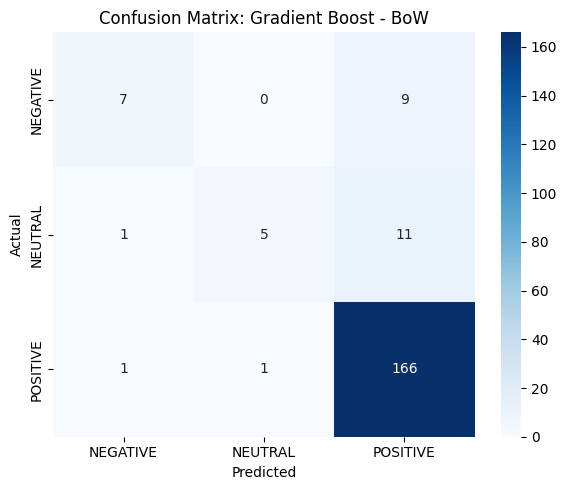

In [55]:
# Best model
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]

print(f"\n✅ Best Model: {best_model_label} (Macro F1 = {best_f1:.4f})\n")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))

# Plot Confusion Matrix
cm = confusion_matrix(y_test_best, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()